In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold,SelectKBest,f_classif
from sklearn.impute import SimpleImputer
from sklearn.base import TransformerMixin ,BaseEstimator
from sklearn.model_selection import train_test_split
from sklearn import tree

In [2]:
data=pd.read_csv("heart-disease.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [5]:
discrete=data.select_dtypes(include=["int64"]).columns
discrete

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [6]:
continous=data.select_dtypes(include=["float64"]).columns
continous

Index(['oldpeak'], dtype='object')

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [8]:
data.select_dtypes("object").columns

Index([], dtype='object')

In [9]:
data["chol"].value_counts().head(20)

chol
204    6
197    6
234    6
269    5
254    5
212    5
211    4
240    4
177    4
243    4
226    4
233    4
239    4
282    4
230    3
244    3
256    3
246    3
201    3
236    3
Name: count, dtype: int64

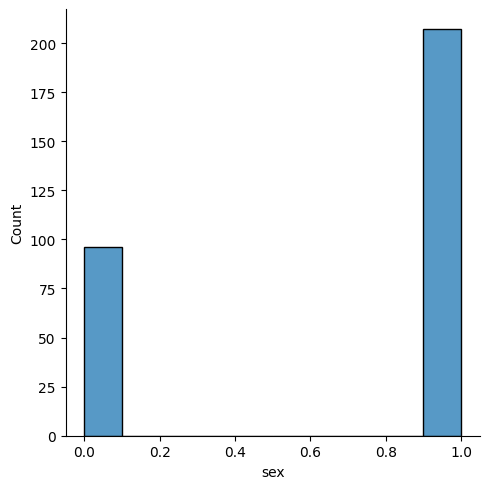

In [10]:
sns.displot(data["sex"])

In [11]:
data["sex"].value_counts()

sex
1    207
0     96
Name: count, dtype: int64

<Axes: xlabel='target'>

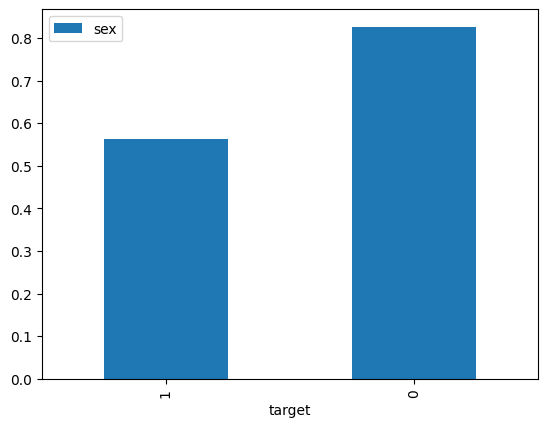

In [12]:
data.groupby(["target"])["sex"].mean().sort_values(ascending=True).plot(kind="bar",legend=True)

In [13]:
data.isna().mean()

age         0.0
sex         0.0
cp          0.0
trestbps    0.0
chol        0.0
fbs         0.0
restecg     0.0
thalach     0.0
exang       0.0
oldpeak     0.0
slope       0.0
ca          0.0
thal        0.0
target      0.0
dtype: float64

In [14]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<Axes: xlabel='age'>

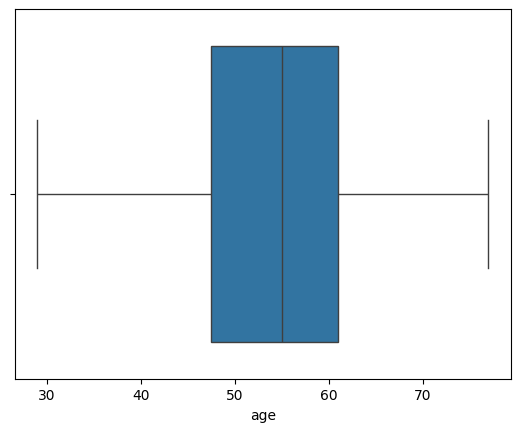

In [15]:
# check the outliers on chol & age 

sns.boxplot(x=data["age"])

# the outlierage is very small:

<Axes: xlabel='age'>

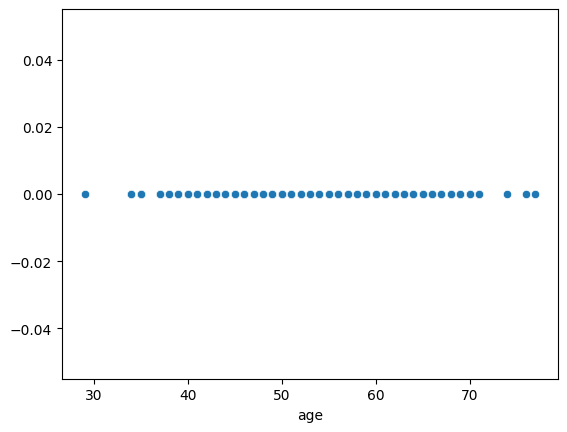

In [16]:
sns.scatterplot(x=data["age"],y=np.zeros_like(data["age"]))

<Axes: xlabel='chol'>

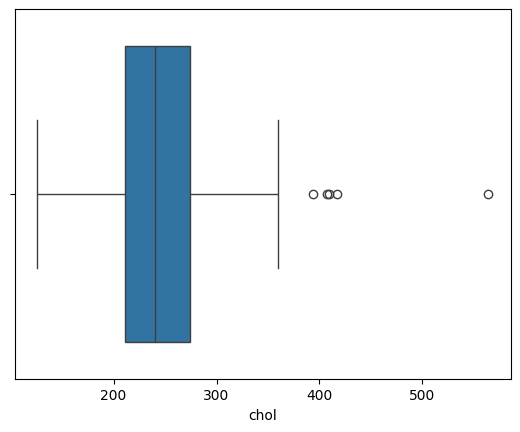

In [17]:
# check the outlier in cohl:

sns.boxplot(x=data["chol"])

# the outlier in the cohl is ver big:

<Axes: xlabel='chol'>

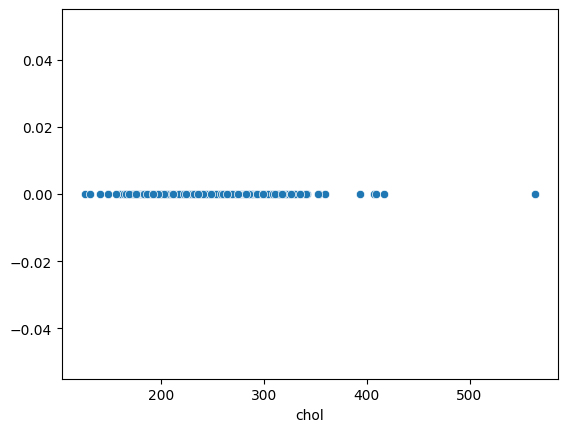

In [18]:
sns.scatterplot(x=data["chol"],y=np.zeros_like(data["chol"]))

In [19]:
# calc the outlier on cohl column:

Q1,Q3=data["chol"].quantile([0.25,0.75])

print("Q1_cohl=",Q1)
print("Q3_cohl=",Q3)

IQR=Q3-Q1

print("IQR_cohk=",IQR)

low_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR

print("low_limit_cohl=",low_limit)
print("upper_limit_cohl=",upper_limit)

outlier=[]

for x in data["chol"]:
    if((x<low_limit) or (x>upper_limit)):
        outlier.append(x)

Q1_cohl= 211.0
Q3_cohl= 274.5
IQR_cohk= 63.5
low_limit_cohl= 115.75
upper_limit_cohl= 369.75


In [20]:
print(outlier)

[417, 564, 394, 407, 409]


In [21]:
print(len(outlier))

5


In [22]:
selector=VarianceThreshold(threshold=0.01)
selector.fit(data.select_dtypes("number"))

VarianceThreshold(threshold=0.01)

In [23]:
selector.get_support(indices=True)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

In [24]:
num_cols=data.select_dtypes("number").columns
num_cols

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [25]:
num_cols[selector.get_support(indices=True)]

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [26]:
df=data.T
duplicates_features=df.duplicated().sum()
duplicates_features

0

In [27]:
data.drop_duplicates()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [28]:
from sklearn.feature_selection import SelectKBest,f_classif

fs=SelectKBest(score_func=f_classif,k=5)
fs.fit(data.drop(columns="target").select_dtypes("number").fillna(0),data["target"])


SelectKBest(k=5)

In [29]:
print(["{:10f}".format(p) for p in fs.pvalues_])

['  0.000075', '  0.000001', '  0.000000', '  0.011546', '  0.138790', '  0.626778', '  0.016840', '  0.000000', '  0.000000', '  0.000000', '  0.000000', '  0.000000', '  0.000000']


In [30]:
print(["{:10f}".format(p) for p in fs.scores_])

[' 16.116700', ' 25.792191', ' 69.772271', '  6.458169', '  2.202983', '  0.236942', '  5.777209', ' 65.120104', ' 70.952438', ' 68.551439', ' 40.902071', ' 54.559834', ' 40.407696']


In [31]:
pvalues_features=pd.DataFrame(fs.pvalues_)
scores_features=pd.DataFrame(fs.scores_)
features=pd.DataFrame(data.drop(columns="target").select_dtypes("number").fillna(0).columns)

score_feature=pd.concat([pvalues_features,scores_features,features],axis=1)
score_feature.columns=["pvalues","scores","inputs"]
score_feature

,pvalues,scores,inputs
0,7.524801e-05,16.116700,age
1,6.678692e-07,25.792191,sex
2,2.469712e-15,69.772271,cp
3,1.154606e-02,6.458169,trestbps
4,1.387903e-01,2.202983,chol
5,6.267775e-01,0.236942,fbs
6,1.683990e-02,5.777209,restecg
7,1.697338e-14,65.120104,thalach
8,1.520814e-15,70.952438,exang
9,4.085346e-15,68.551439,oldpeak


In [32]:
from sklearn.feature_selection import mutual_info_classif

mic=SelectKBest(score_func=mutual_info_classif,k=5)
mic.fit(data.drop(columns="target").select_dtypes("number").fillna(0),data["target"])

features_MI_scores=pd.Series(mic.scores_,index=data.drop(columns="target").select_dtypes("number").fillna(0).columns)
features_MI_scores.sort_values(ascending=True)

age         0.000000
restecg     0.002256
trestbps    0.009129
fbs         0.023829
slope       0.046225
sex         0.056016
ca          0.066236
chol        0.066730
thalach     0.072229
exang       0.110669
cp          0.137546
thal        0.142046
oldpeak     0.152378
dtype: float64

In [33]:
#tree descion:

data=pd.get_dummies(data,dtype=int)
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [34]:
x=data.drop("target",axis=1)
y=data["target"]

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,stratify=y,random_state=42)


In [36]:
model=tree.DecisionTreeClassifier(max_depth=5,random_state=42)
model.fit(x_train,y_train)


DecisionTreeClassifier(max_depth=5, random_state=42)

In [37]:
print(f"accuracy={model.score(x_test,y_test)*100:0.2f}%")

accuracy=78.02%


In [38]:
text_represention=tree.export_text(model)
print(text_represention)

|--- feature_2 <= 0.50
|   |--- feature_9 <= 0.70
|   |   |--- feature_11 <= 0.50
|   |   |   |--- feature_0 <= 41.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_0 >  41.50
|   |   |   |   |--- feature_10 <= 1.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_10 >  1.50
|   |   |   |   |   |--- class: 1
|   |   |--- feature_11 >  0.50
|   |   |   |--- feature_1 <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- feature_1 >  0.50
|   |   |   |   |--- feature_7 <= 118.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_7 >  118.50
|   |   |   |   |   |--- class: 0
|   |--- feature_9 >  0.70
|   |   |--- feature_3 <= 106.00
|   |   |   |--- class: 1
|   |   |--- feature_3 >  106.00
|   |   |   |--- feature_10 <= 1.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_10 >  1.50
|   |   |   |   |--- feature_12 <= 2.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_12 >  2.50
|   |   |   |   |   |--- class: 0
|--- feature_2 > 

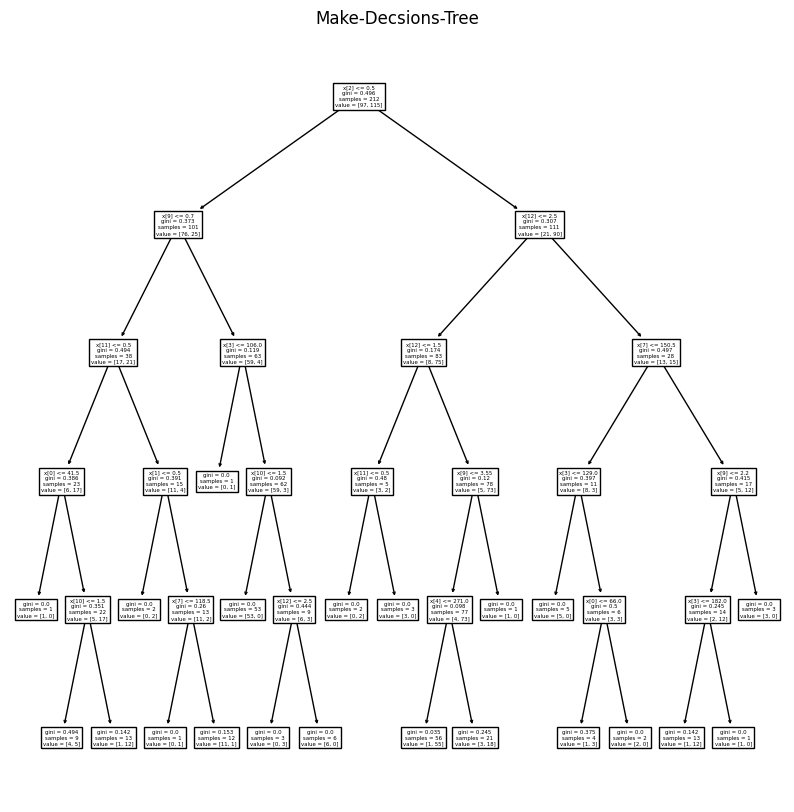

In [39]:
plt.figure(figsize=(10,10))
tree.plot_tree(model,max_depth=5)
plt.title("Make-Decsions-Tree")
plt.show()